In [1]:
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('../Data/HaNoi.csv')
df['date'] = pd.to_datetime(df['date'])


# Split the dataset into training and test sets
#train_df = df[(df['date'] >= '2019-03-01') & (df['date'] <= '2024-03-01')]
#test_df = df[df['date'] > '2024-03-01']
train_df = df[:int(0.8*len(df))]
test_df = df[int(0.8*len(df)):]
train_df

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,2014-01-01,95,124,22,40,6,28,124
1,2,2014-01-02,186,144,69,39,8,43,186
2,3,2014-01-03,227,151,24,25,12,28,227
3,4,2014-01-04,253,48,13,19,12,14,253
4,5,2014-01-05,95,115,65,35,5,33,115
...,...,...,...,...,...,...,...,...,...
2218,2219,2022-08-31,29,21,8,21,15,4,29
2219,2220,2022-09-01,36,18,12,21,15,4,36
2220,2221,2022-09-02,30,23,13,30,15,7,30
2221,2222,2022-09-03,38,19,9,21,15,4,38


In [3]:
model = SimpleExpSmoothing(np.asarray(train_df["AQI"]))
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test_df.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_df))
y_hat_ses


{'smoothing_level': 0.5832790930618291, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 124.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI,ses_forecast
2223,2224,2022-09-05,24,26,18,32,15,7,32,33.33631
2224,2225,2022-09-06,41,35,18,35,15,8,41,33.33631
2225,2226,2022-09-07,57,19,7,19,15,5,57,33.33631
2226,2227,2022-09-08,35,18,6,26,15,10,35,33.33631
2227,2228,2022-09-09,30,26,10,29,15,9,30,33.33631
...,...,...,...,...,...,...,...,...,...,...
2774,2775,2024-03-21,130,72,13,1,8,8,130,33.33631
2775,2776,2024-03-22,112,56,9,1,8,5,112,33.33631
2776,2777,2024-03-23,76,54,11,1,7,6,76,33.33631
2777,2778,2024-03-24,72,53,11,1,7,7,72,33.33631


In [4]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_df['AQI'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['AQI']-y_hat_ses['ses_forecast'])/test_df['AQI'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,62.41,51.83


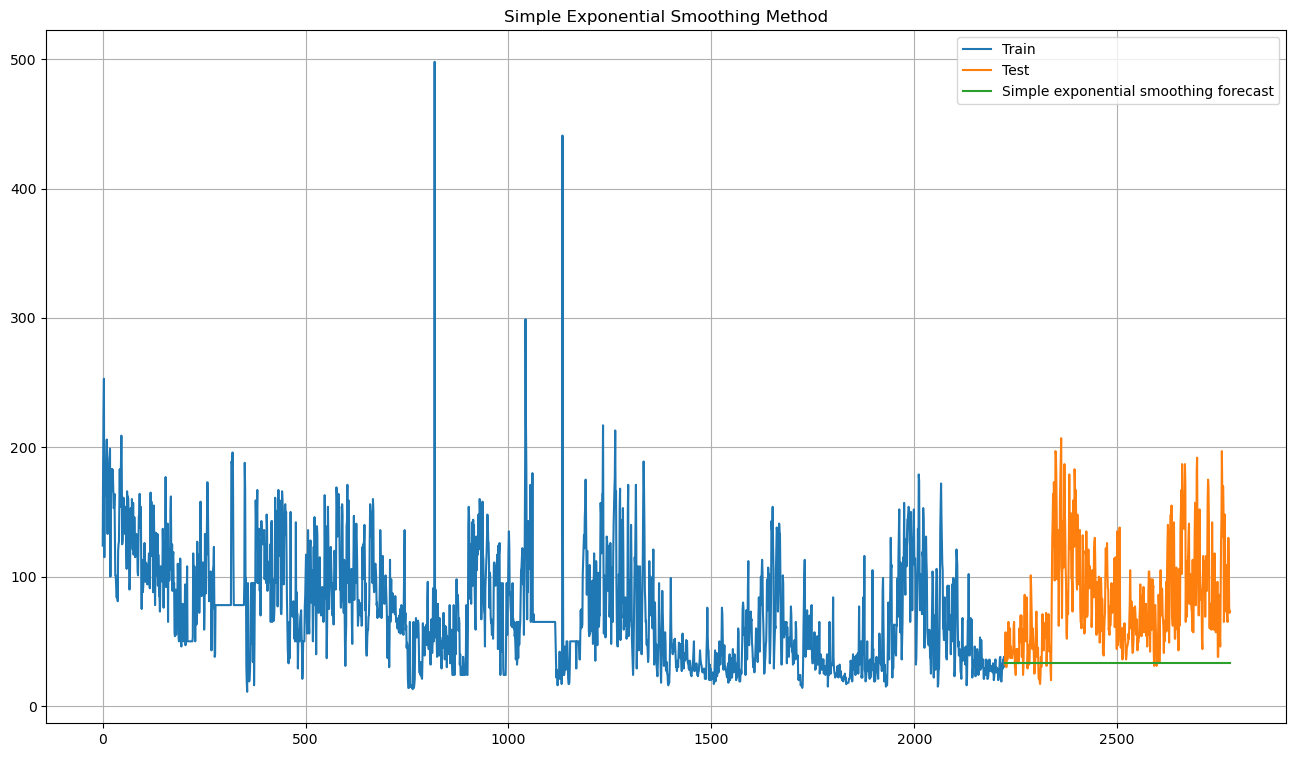

In [5]:
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(train_df["AQI"], label='Train')
plt.plot(test_df["AQI"], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()